# Test Bench

Test bench is a class we created that takes in some perediction model and creates multiple instances of that model. Each instance is trained and tested on different data, it is used to easily access the quality of each model on multiple datasets. 

## What tests will be performed?

As of writing this, the test that will be prerforme are the following:

In [1]:
# node mem
{"metric": "node_mem",      "app": "moc/smaug",       "prediction length": 16, "sub sample rate": 30, "data length limit": 30},
{"metric": "node_mem",      "app": "emea/balrog",     "prediction length": 16, "sub sample rate": 30, "data length limit": 30},
# container mem
{"metric": "container_mem", "app": "nmstate-handler", "prediction length": 16, "sub sample rate": 30, "data length limit": 30},
{"metric": "container_mem", "app": "coredns",         "prediction length": 16, "sub sample rate": 30, "data length limit": 30},
{"metric": "container_mem", "app": "keepalived",      "prediction length": 16, "sub sample rate": 30, "data length limit": 30},
# container cpu
{"metric": "container_cpu", "app": "kube-rbac-proxy", "prediction length": 16, "sub sample rate": 30, "data length limit": 30},
{"metric": "container_cpu", "app": "dns",             "prediction length": 16, "sub sample rate": 30, "data length limit": 30},
{"metric": "container_cpu", "app": "collector",       "prediction length": 16, "sub sample rate": 30, "data length limit": 30},
pass

This might change because we might want to predict further into the future or sub-sample more to make it easier for the model to notice the format of the data. As we can see in this example, we would have one sample for each half an hour (maximum value in that time frame), we throw out time series that are shorter than 30 samples (or 15 hours) long, and we are asked to predict 16 samples (or 8 hours) into the future. This test is the same for all models, whcich is where fairness comes from.

## How Is It Used?

First define a class that has these functions:
1. `learn_from_data_set`
2. `predict`

In [2]:
import numpy as np
import src.framework__test_bench as bench

In [3]:
class DumbPredictor:
    def __init__(self, length_of_shortest_time_series, metric, app):
        print("Constructor called.")
        self.print_once = True

    def learn_from_data_set(self, training_data_set):
        print("Training started.")
        print("What does a dataframe to learn on look like?")
        display(training_data_set[0])
        print("Training ending.")

    def predict(self, ts_as_df_start, how_much_to_predict):
        if self.print_once:
            self.print_once = False
            print("What does a dataframe to predict look like?")
            display(ts_as_df_start)
        ts_as_np = ts_as_df_start["sample"].to_numpy()
        res = np.resize(ts_as_np, how_much_to_predict)
        # these checks will also be done by the testbench
        assert isinstance(res, np.ndarray)
        assert len(res) == how_much_to_predict
        assert res.shape == (how_much_to_predict,)
        assert res.dtype == np.float64
        return res

After the model has been defined (including how you choose to you use each sample for learning, what optimization algorithms and so on) you can send the model to the test_bench to be used for prediction on multiple models.
Notice that the class you denfine need to have these methods with the same argument names.

Let's now run the test bench on this class.

[TEST BENCH] Powering on test bench
[TEST BENCH] testing metric='node_mem', app='moc/smaug'.
[TEST BENCH] Fetching data for metric='node_mem', app='moc/smaug'.
[TEST BENCH] Subsampling data from 1 sample per 1 minute to 1 sample per 30 minutes.
[TEST BENCH] Throwing out data that is less than 15.0 hours long.
[TEST BENCH] Scaling data.
[TEST BENCH] Splitting data into train and test
[TEST BENCH] Amount of train/test data is 61
[TEST BENCH] Making an instance of the class we want to test
Constructor called.
[TEST BENCH] Starting training loop
Training started.
What does a dataframe to learn on look like?


,sample,time
0,-0.738500,2022-05-28 10:29:00
1,-0.738497,2022-05-28 10:59:00
2,-0.738499,2022-05-28 11:29:00
3,-0.738478,2022-05-28 11:59:00
4,-0.736303,2022-05-28 12:29:00
...,...,...
62,-0.714073,2022-05-29 17:29:00
63,-0.714018,2022-05-29 17:59:00
64,-0.713957,2022-05-29 18:29:00
65,-0.713895,2022-05-29 18:59:00


Training ending.
[TEST BENCH] Training took 0.06658625602722168 seconds.
[TEST BENCH] Starting testing loop
What does a dataframe to predict look like?


,sample,time
0,-0.738500,2022-05-28 10:29:00
1,-0.738497,2022-05-28 10:59:00
2,-0.738499,2022-05-28 11:29:00
3,-0.738478,2022-05-28 11:59:00
4,-0.736303,2022-05-28 12:29:00
...,...,...
62,-0.714073,2022-05-29 17:29:00
63,-0.714018,2022-05-29 17:59:00
64,-0.713957,2022-05-29 18:29:00
65,-0.713895,2022-05-29 18:59:00


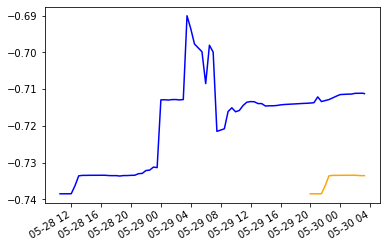

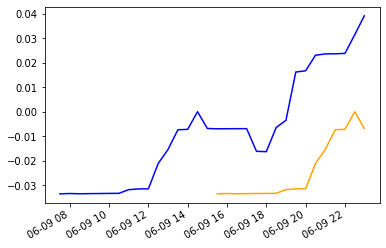

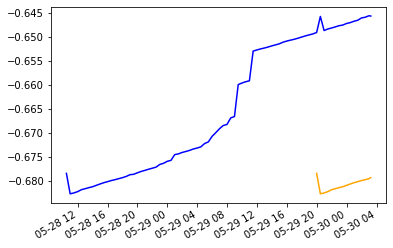

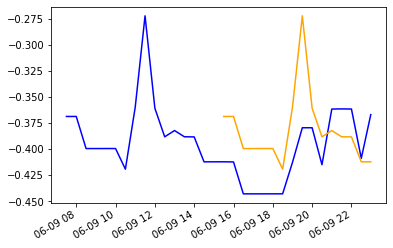

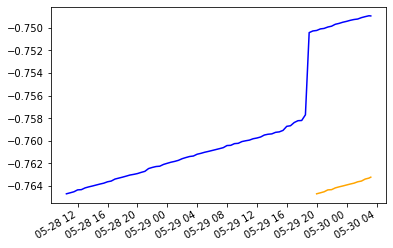

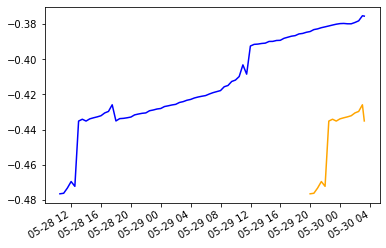

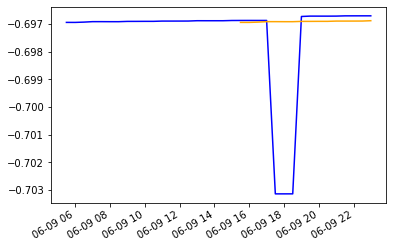

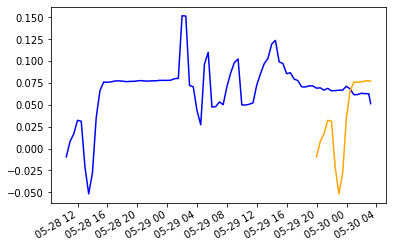

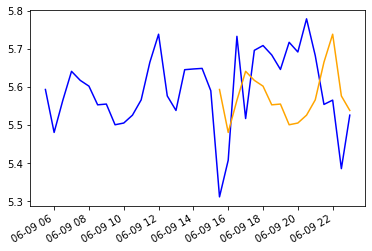

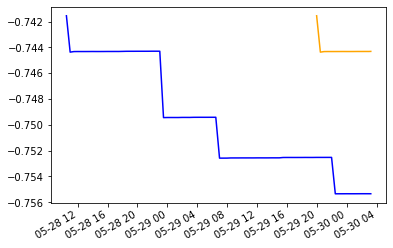

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='node_mem', app='moc/smaug':
[TEST BENCH] Training time in seconds is             0.06658625602722168
[TEST BENCH] Average mse over the test set is        0.011412570506251465
[TEST BENCH] Average precision over the test set is  0.7044309970539478
[TEST BENCH] Average recall over the test set is     0.7418089196777721
[TEST BENCH] Average F1 over the test set is         0.7182935874481713
[TEST BENCH] Average MASE over the test set is       51.237336511265184
[TEST BENCH] Average MAPE over the test set is       0.22012937072063538
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='node_mem', app='moc/smaug'
[TEST BENCH] testing metric='node_mem', app='emea/balrog'.
[TEST BENCH] Fetching data for metric='node_mem', app='emea/balrog'.
[TEST BENCH] Subsampling data from 1 sample per

,sample,time
0,-0.102903,2022-06-08 03:30:00
1,-0.102853,2022-06-08 04:00:00
2,-0.102855,2022-06-08 04:30:00
3,-0.102856,2022-06-08 05:00:00
4,-0.102856,2022-06-08 05:30:00
5,-0.102819,2022-06-08 06:00:00
6,-0.102817,2022-06-08 06:30:00
7,-0.102819,2022-06-08 07:00:00
8,-0.102819,2022-06-08 07:30:00
9,-0.102781,2022-06-08 08:00:00


Training ending.
[TEST BENCH] Training took 0.025889873504638672 seconds.
[TEST BENCH] Starting testing loop
What does a dataframe to predict look like?


,sample,time
0,-0.102903,2022-06-08 03:30:00
1,-0.102853,2022-06-08 04:00:00
2,-0.102855,2022-06-08 04:30:00
3,-0.102856,2022-06-08 05:00:00
4,-0.102856,2022-06-08 05:30:00
5,-0.102819,2022-06-08 06:00:00
6,-0.102817,2022-06-08 06:30:00
7,-0.102819,2022-06-08 07:00:00
8,-0.102819,2022-06-08 07:30:00
9,-0.102781,2022-06-08 08:00:00


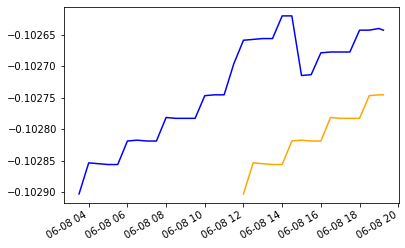

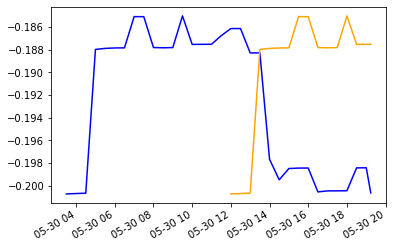

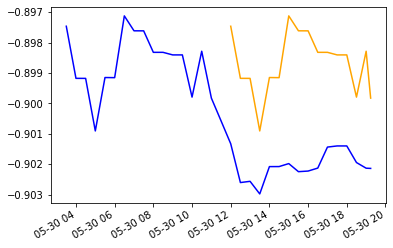

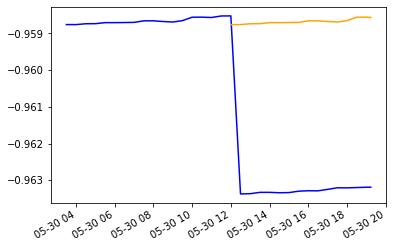

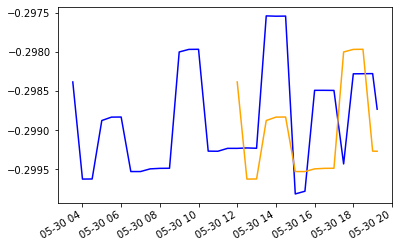

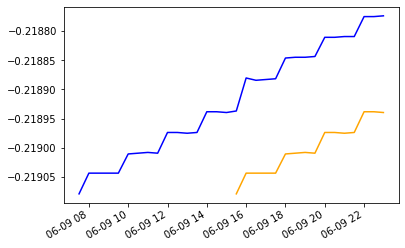

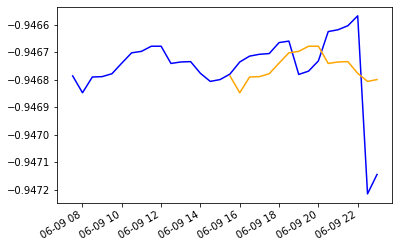

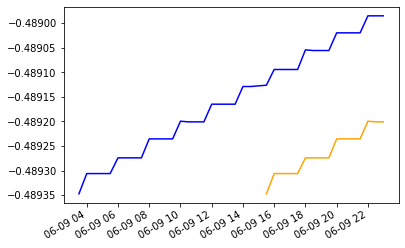

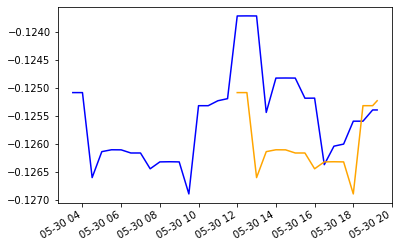

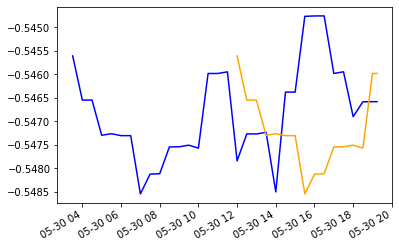

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='node_mem', app='emea/balrog':
[TEST BENCH] Training time in seconds is             0.025889873504638672
[TEST BENCH] Average mse over the test set is        0.0029231497630708737
[TEST BENCH] Average precision over the test set is  0.6710168997668997
[TEST BENCH] Average recall over the test set is     0.6812275224775226
[TEST BENCH] Average F1 over the test set is         0.6682876854902027
[TEST BENCH] Average MASE over the test set is       21.737775156061467
[TEST BENCH] Average MAPE over the test set is       0.04961831206706902
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='node_mem', app='emea/balrog'
[TEST BENCH] testing metric='container_mem', app='nmstate-handler'.
[TEST BENCH] Fetching data for metric='container_mem', app='nmstate-handler'.
[TEST BENCH] Subsamplin

,sample,time
0,1.646071,2022-06-07 03:30:00
1,1.058519,2022-06-07 04:00:00
2,0.955958,2022-06-07 04:30:00
3,1.079726,2022-06-07 05:00:00
4,0.825931,2022-06-07 05:30:00
5,4.091194,2022-06-07 06:00:00
6,0.256457,2022-06-07 06:30:00
7,1.815384,2022-06-07 07:00:00
8,0.385093,2022-06-07 07:30:00
9,1.246605,2022-06-07 08:00:00


Training ending.
[TEST BENCH] Training took 0.04364323616027832 seconds.
[TEST BENCH] Starting testing loop
What does a dataframe to predict look like?


,sample,time
0,1.646071,2022-06-07 03:30:00
1,1.058519,2022-06-07 04:00:00
2,0.955958,2022-06-07 04:30:00
3,1.079726,2022-06-07 05:00:00
4,0.825931,2022-06-07 05:30:00
5,4.091194,2022-06-07 06:00:00
6,0.256457,2022-06-07 06:30:00
7,1.815384,2022-06-07 07:00:00
8,0.385093,2022-06-07 07:30:00
9,1.246605,2022-06-07 08:00:00


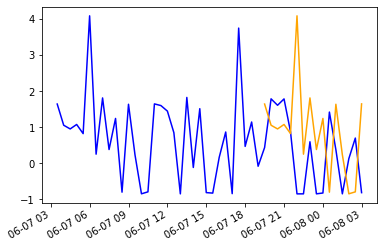

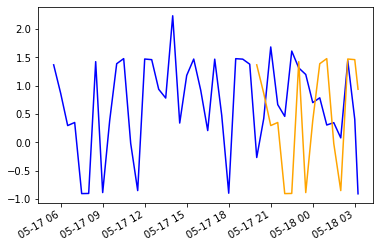

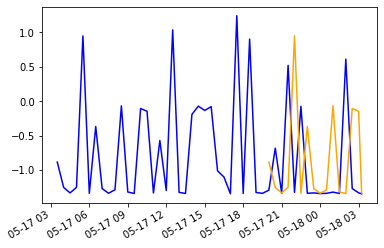

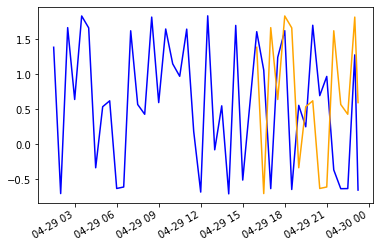

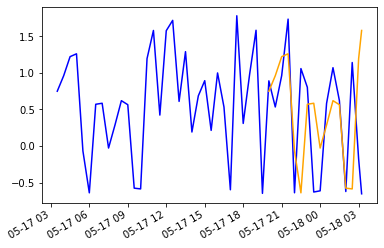

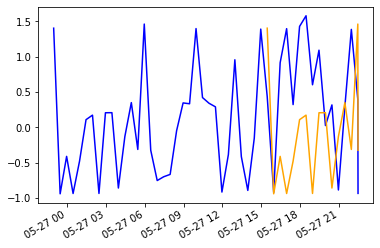

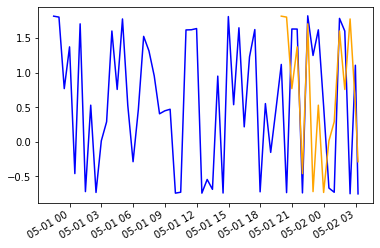

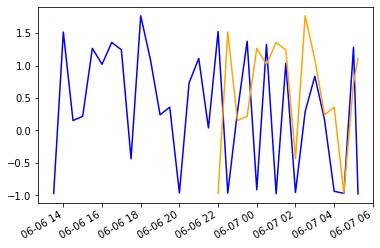

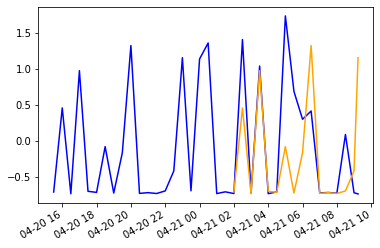

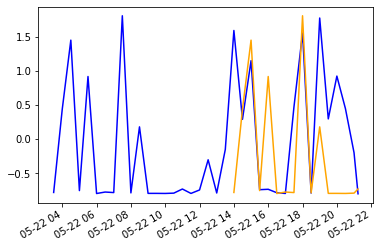

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='container_mem', app='nmstate-handler':
[TEST BENCH] Training time in seconds is             0.04364323616027832
[TEST BENCH] Average mse over the test set is        1.7227890365921383
[TEST BENCH] Average precision over the test set is  0.4769557460201324
[TEST BENCH] Average recall over the test set is     0.49838380934960397
[TEST BENCH] Average F1 over the test set is         0.4809217763179931
[TEST BENCH] Average MASE over the test set is       1.0411722375560972
[TEST BENCH] Average MAPE over the test set is       6.429962624495248
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='container_mem', app='nmstate-handler'
[TEST BENCH] testing metric='container_mem', app='coredns'.
[TEST BENCH] Fetching data for metric='container_mem', app='coredns'.
[TEST BENCH] Subsampling d

,sample,time
0,-0.819371,2022-05-08 23:30:00
1,-0.693275,2022-05-09 00:00:00
2,-0.513939,2022-05-09 00:30:00
3,-0.689072,2022-05-09 01:00:00
4,-0.661051,2022-05-09 01:30:00
5,-0.736708,2022-05-09 02:00:00
6,-0.733906,2022-05-09 02:30:00
7,-0.715692,2022-05-09 03:00:00
8,-0.700281,2022-05-09 03:30:00
9,-0.686270,2022-05-09 04:00:00


Training ending.
[TEST BENCH] Training took 0.05335426330566406 seconds.
[TEST BENCH] Starting testing loop
What does a dataframe to predict look like?


,sample,time
0,-0.819371,2022-05-08 23:30:00
1,-0.693275,2022-05-09 00:00:00
2,-0.513939,2022-05-09 00:30:00
3,-0.689072,2022-05-09 01:00:00
4,-0.661051,2022-05-09 01:30:00
5,-0.736708,2022-05-09 02:00:00
6,-0.733906,2022-05-09 02:30:00
7,-0.715692,2022-05-09 03:00:00
8,-0.700281,2022-05-09 03:30:00
9,-0.686270,2022-05-09 04:00:00


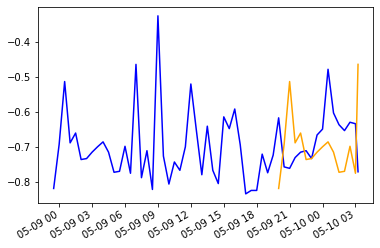

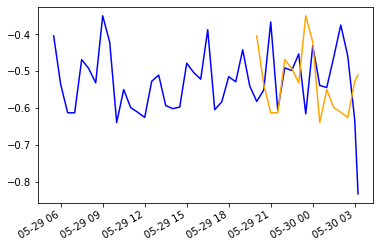

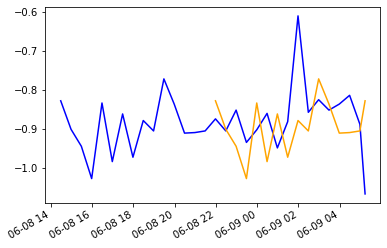

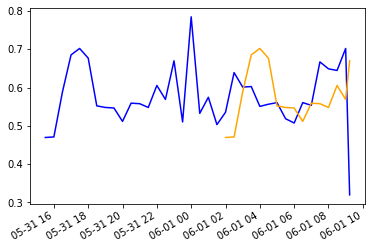

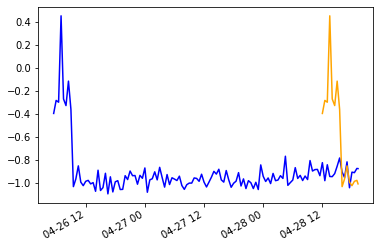

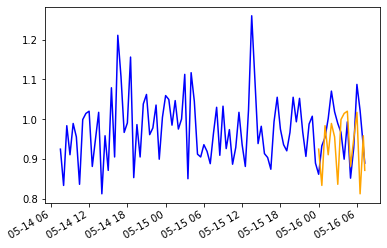

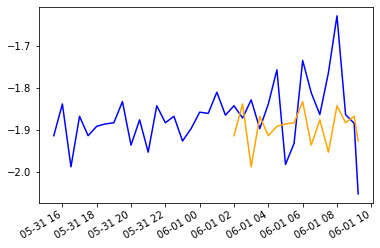

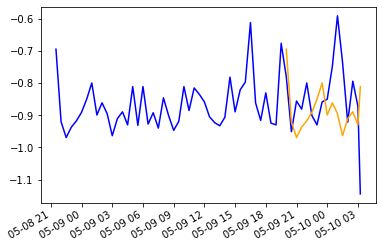

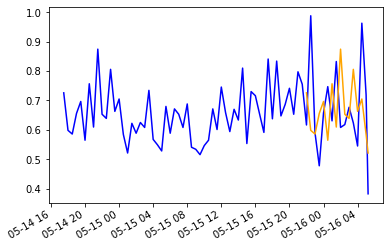

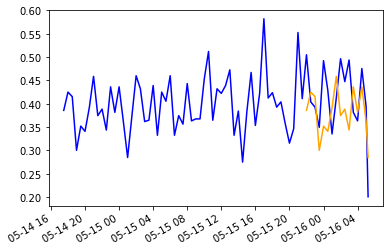

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='container_mem', app='coredns':
[TEST BENCH] Training time in seconds is             0.05335426330566406
[TEST BENCH] Average mse over the test set is        0.04026297067547736
[TEST BENCH] Average precision over the test set is  0.4725728435231676
[TEST BENCH] Average recall over the test set is     0.49789362305561036
[TEST BENCH] Average F1 over the test set is         0.4783490739334641
[TEST BENCH] Average MASE over the test set is       1.550200128167866
[TEST BENCH] Average MAPE over the test set is       0.964046675544759
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='container_mem', app='coredns'
[TEST BENCH] testing metric='container_mem', app='keepalived'.
[TEST BENCH] Fetching data for metric='container_mem', app='keepalived'.
[TEST BENCH] Subsampling data from 1

,sample,time
0,0.965094,2022-05-12 21:29:00
1,0.880603,2022-05-12 21:59:00
2,0.803256,2022-05-12 22:29:00
3,0.800905,2022-05-12 22:59:00
4,0.806441,2022-05-12 23:29:00
5,0.923173,2022-05-12 23:59:00
6,0.928879,2022-05-13 00:29:00
7,0.811621,2022-05-13 00:59:00
8,0.811838,2022-05-13 01:29:00
9,0.923359,2022-05-13 01:59:00


Training ending.
[TEST BENCH] Training took 0.05454301834106445 seconds.
[TEST BENCH] Starting testing loop
What does a dataframe to predict look like?


,sample,time
0,0.965094,2022-05-12 21:29:00
1,0.880603,2022-05-12 21:59:00
2,0.803256,2022-05-12 22:29:00
3,0.800905,2022-05-12 22:59:00
4,0.806441,2022-05-12 23:29:00
5,0.923173,2022-05-12 23:59:00
6,0.928879,2022-05-13 00:29:00
7,0.811621,2022-05-13 00:59:00
8,0.811838,2022-05-13 01:29:00
9,0.923359,2022-05-13 01:59:00


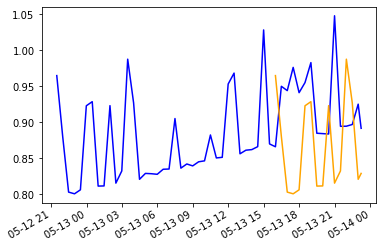

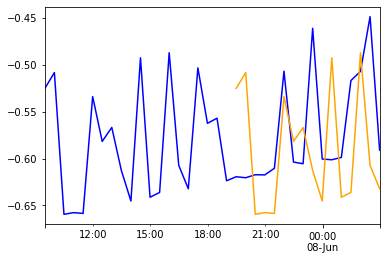

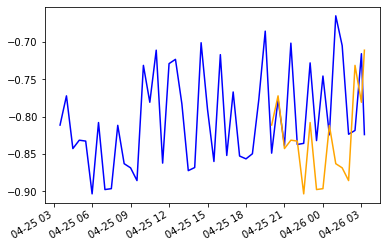

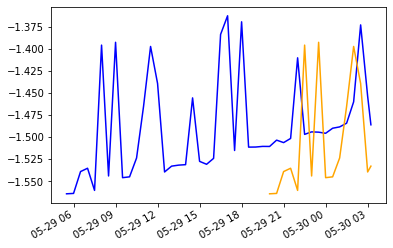

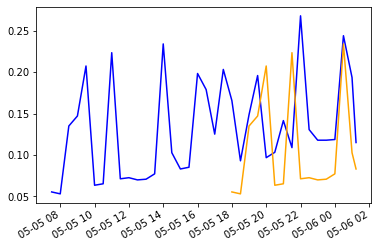

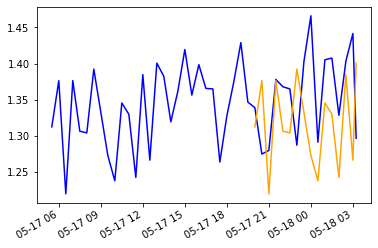

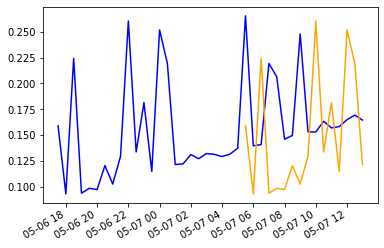

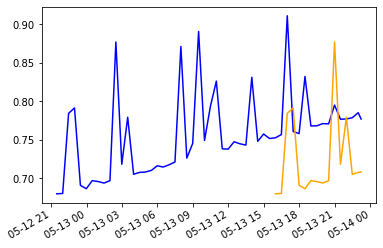

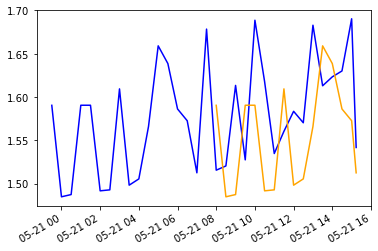

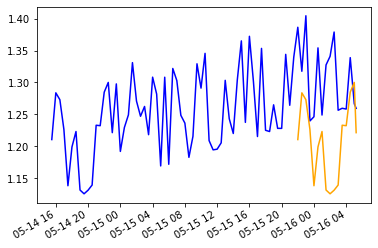

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='container_mem', app='keepalived':
[TEST BENCH] Training time in seconds is             0.05454301834106445
[TEST BENCH] Average mse over the test set is        0.01764324926895911
[TEST BENCH] Average precision over the test set is  0.5266960242822308
[TEST BENCH] Average recall over the test set is     0.5536393491565904
[TEST BENCH] Average F1 over the test set is         0.5336569911471158
[TEST BENCH] Average MASE over the test set is       1.776235962809656
[TEST BENCH] Average MAPE over the test set is       0.43921581589656783
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='container_mem', app='keepalived'
[TEST BENCH] testing metric='container_cpu', app='kube-rbac-proxy'.
[TEST BENCH] Fetching data for metric='container_cpu', app='kube-rbac-proxy'.
[TEST BENCH] Subsam

,sample,time
0,-0.345655,2022-05-08 17:30:00
1,-0.314052,2022-05-08 18:00:00
2,-0.255430,2022-05-08 18:30:00
3,-0.274071,2022-05-08 19:00:00
4,-0.224008,2022-05-08 19:30:00
5,-0.255666,2022-05-08 20:00:00
6,-0.088620,2022-05-08 20:30:00
7,-0.273577,2022-05-08 21:00:00
8,-0.496560,2022-05-08 21:30:00
9,-0.058992,2022-05-08 22:00:00


Training ending.
[TEST BENCH] Training took 0.05275726318359375 seconds.
[TEST BENCH] Starting testing loop
What does a dataframe to predict look like?


,sample,time
0,-0.345655,2022-05-08 17:30:00
1,-0.314052,2022-05-08 18:00:00
2,-0.255430,2022-05-08 18:30:00
3,-0.274071,2022-05-08 19:00:00
4,-0.224008,2022-05-08 19:30:00
5,-0.255666,2022-05-08 20:00:00
6,-0.088620,2022-05-08 20:30:00
7,-0.273577,2022-05-08 21:00:00
8,-0.496560,2022-05-08 21:30:00
9,-0.058992,2022-05-08 22:00:00


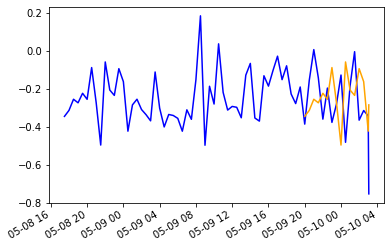

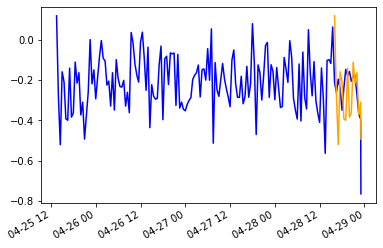

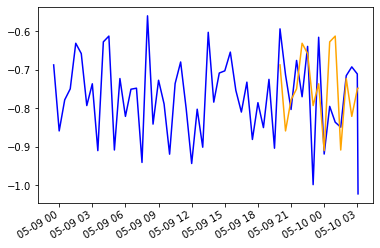

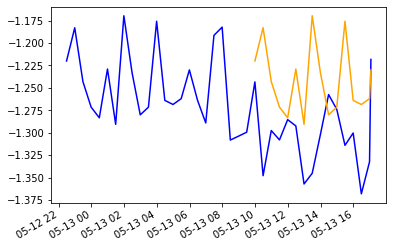

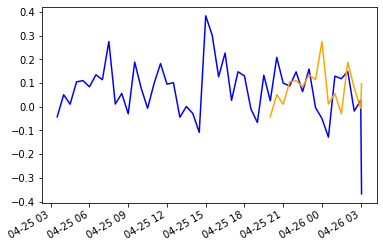

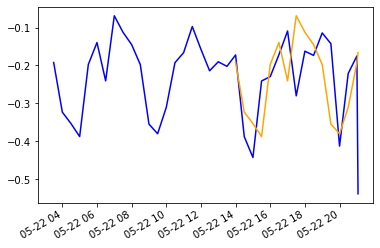

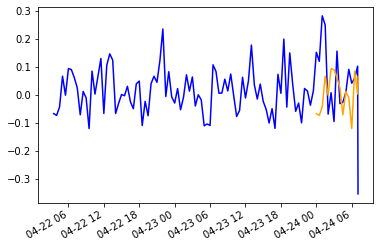

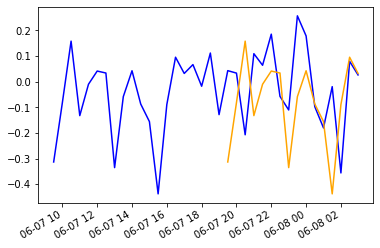

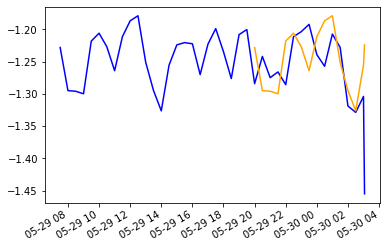

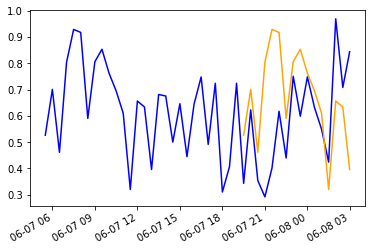

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='container_cpu', app='kube-rbac-proxy':
[TEST BENCH] Training time in seconds is             0.05275726318359375
[TEST BENCH] Average mse over the test set is        0.13267374929871892
[TEST BENCH] Average precision over the test set is  0.47127135194402003
[TEST BENCH] Average recall over the test set is     0.5011605532211882
[TEST BENCH] Average F1 over the test set is         0.479054796402705
[TEST BENCH] Average MASE over the test set is       1.3747733577347263
[TEST BENCH] Average MAPE over the test set is       1.2985770654502007
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='container_cpu', app='kube-rbac-proxy'
[TEST BENCH] testing metric='container_cpu', app='dns'.
[TEST BENCH] Fetching data for metric='container_cpu', app='dns'.
[TEST BENCH] Subsampling data fro

,sample,time
0,-0.774830,2022-05-05 05:30:00
1,-0.800051,2022-05-05 06:00:00
2,-0.743835,2022-05-05 06:30:00
3,-0.807032,2022-05-05 07:00:00
4,-0.830955,2022-05-05 07:30:00
5,-0.690211,2022-05-05 08:00:00
6,-0.867332,2022-05-05 08:30:00
7,-0.777424,2022-05-05 09:00:00
8,-0.581109,2022-05-05 09:30:00
9,-0.592610,2022-05-05 10:00:00


Training ending.
[TEST BENCH] Training took 0.022601842880249023 seconds.
[TEST BENCH] Starting testing loop
What does a dataframe to predict look like?


,sample,time
0,-0.774830,2022-05-05 05:30:00
1,-0.800051,2022-05-05 06:00:00
2,-0.743835,2022-05-05 06:30:00
3,-0.807032,2022-05-05 07:00:00
4,-0.830955,2022-05-05 07:30:00
5,-0.690211,2022-05-05 08:00:00
6,-0.867332,2022-05-05 08:30:00
7,-0.777424,2022-05-05 09:00:00
8,-0.581109,2022-05-05 09:30:00
9,-0.592610,2022-05-05 10:00:00


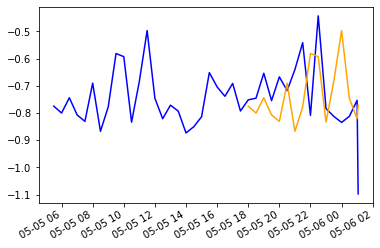

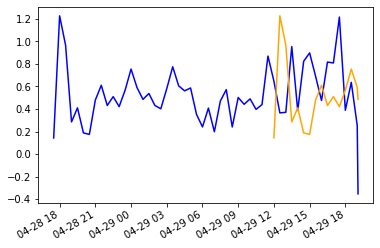

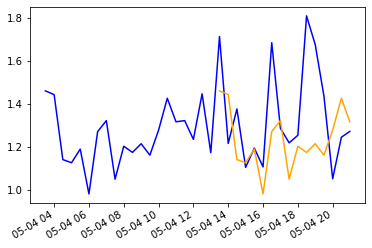

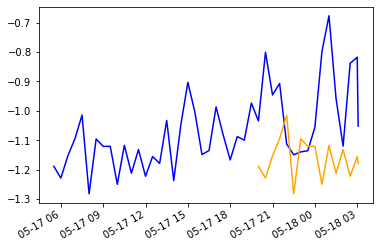

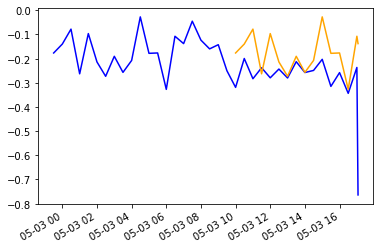

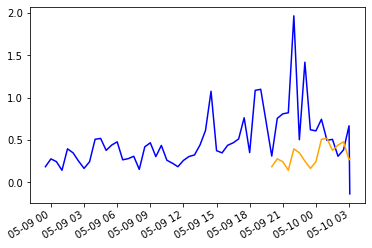

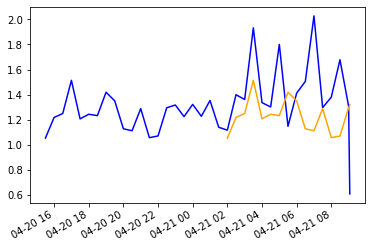

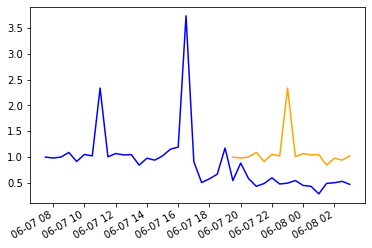

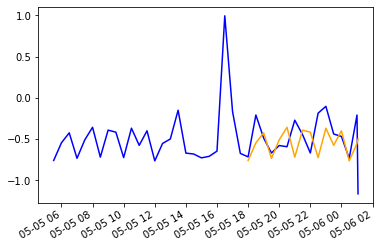

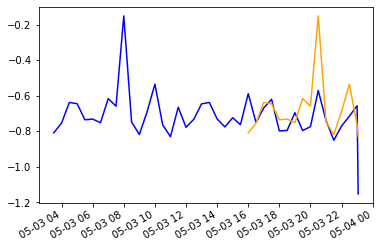

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='container_cpu', app='dns':
[TEST BENCH] Training time in seconds is             0.022601842880249023
[TEST BENCH] Average mse over the test set is        0.1813983780698016
[TEST BENCH] Average precision over the test set is  0.473715080175754
[TEST BENCH] Average recall over the test set is     0.5047957099080694
[TEST BENCH] Average F1 over the test set is         0.4823664358353201
[TEST BENCH] Average MASE over the test set is       1.3962925252716525
[TEST BENCH] Average MAPE over the test set is       2.037558579069556
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='container_cpu', app='dns'
[TEST BENCH] testing metric='container_cpu', app='collector'.
[TEST BENCH] Fetching data for metric='container_cpu', app='collector'.
[TEST BENCH] Subsampling data from 1 sample per

,sample,time
0,-0.764033,2022-05-17 05:30:00
1,-0.761919,2022-05-17 06:00:00
2,-0.770866,2022-05-17 06:30:00
3,-0.737269,2022-05-17 07:00:00
4,-0.777321,2022-05-17 07:30:00
5,-0.765228,2022-05-17 08:00:00
6,-0.770879,2022-05-17 08:30:00
7,-0.767418,2022-05-17 09:00:00
8,-0.753986,2022-05-17 09:30:00
9,-0.773127,2022-05-17 10:00:00


Training ending.
[TEST BENCH] Training took 0.07625865936279297 seconds.
[TEST BENCH] Starting testing loop
What does a dataframe to predict look like?


,sample,time
0,-0.764033,2022-05-17 05:30:00
1,-0.761919,2022-05-17 06:00:00
2,-0.770866,2022-05-17 06:30:00
3,-0.737269,2022-05-17 07:00:00
4,-0.777321,2022-05-17 07:30:00
5,-0.765228,2022-05-17 08:00:00
6,-0.770879,2022-05-17 08:30:00
7,-0.767418,2022-05-17 09:00:00
8,-0.753986,2022-05-17 09:30:00
9,-0.773127,2022-05-17 10:00:00


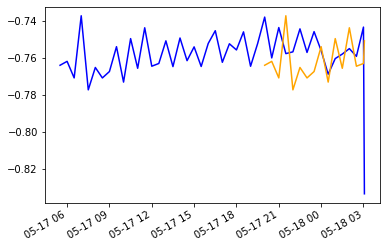

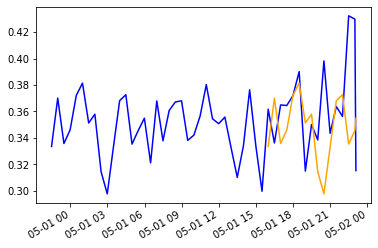

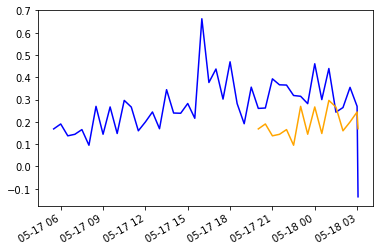

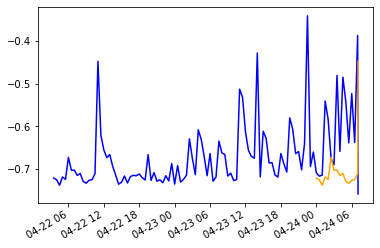

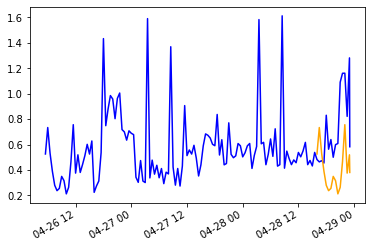

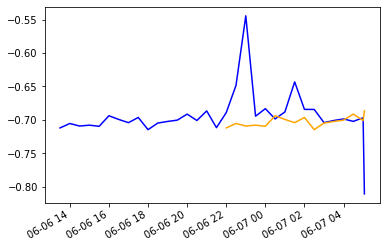

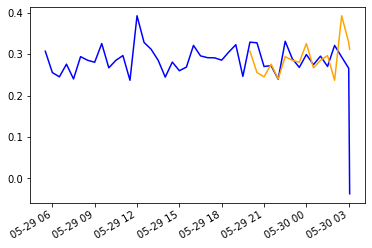

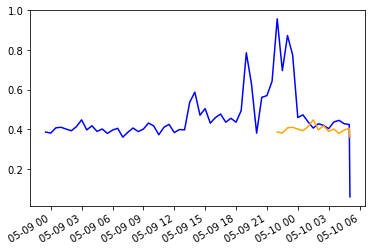

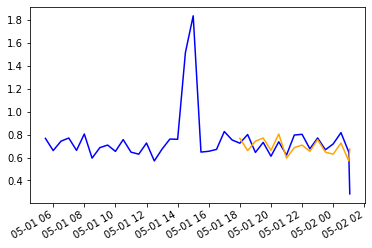

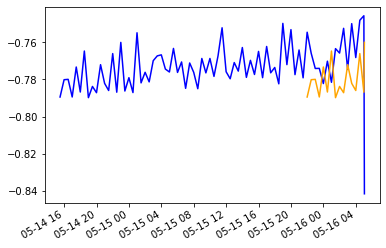

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='container_cpu', app='collector':
[TEST BENCH] Training time in seconds is             0.07625865936279297
[TEST BENCH] Average mse over the test set is        0.5384308604060658
[TEST BENCH] Average precision over the test set is  0.4823360331424848
[TEST BENCH] Average recall over the test set is     0.515930120826434
[TEST BENCH] Average F1 over the test set is         0.4921368886123635
[TEST BENCH] Average MASE over the test set is       2.1063131856428368
[TEST BENCH] Average MAPE over the test set is       1.8954327174167116
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='container_cpu', app='collector'
[TEST BENCH] | metric | app | training time | mse | precision | recall | F1 | MASE | MAPE |
[TEST BENCH] | node_mem | moc/smaug | 0 seconds   | 0.01141 | 0.70443 | 0.741

In [4]:
tb = bench.TestBench(
    class_to_test=DumbPredictor,
    path_to_data="./data/"
)
tb.run_training_and_tests()